## 1. Data Preparation

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

#### a. Load MNIST data

In [14]:
# a. Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

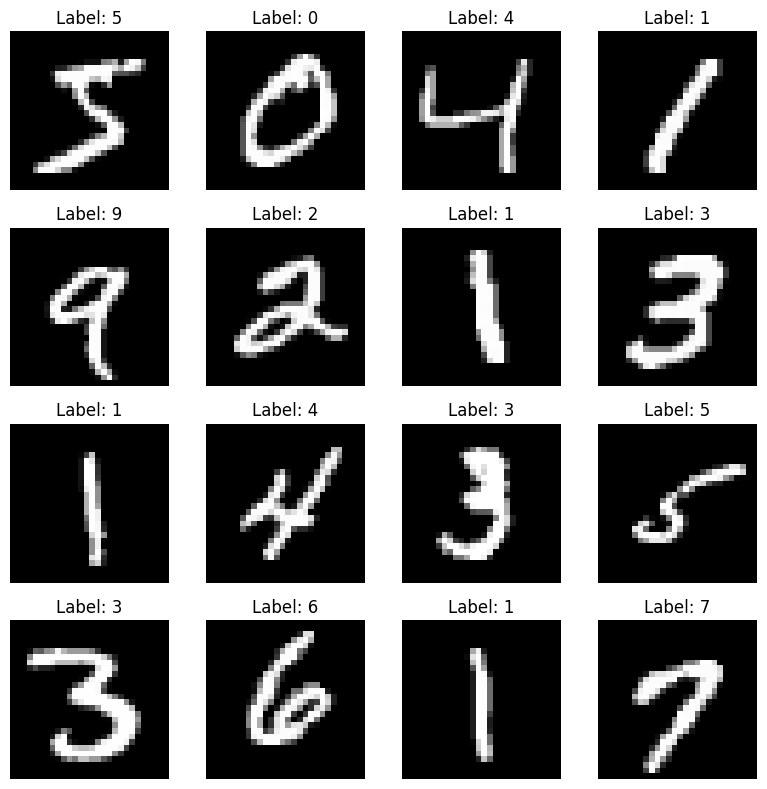

In [15]:
# Plot a sample of the images
num_rows, num_cols = 4, 4  # grid layout for the images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='gray')
    ax.axis('off')  # hide the axes ticks
    ax.set_title(f"Label: {train_labels[i]}")

plt.tight_layout()
plt.show()

#### c. Normalize the images to be between 0 and 1

In [16]:
# Normalize the images to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#### b.Flatten the images to 1D vectors of 784 elements

In [17]:
# Flatten the images to 1D vectors of 784 elements
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


### 2. Model Design

In [18]:
from tensorflow import keras

input_dimension = 784  # This should be the size of the flattened input image (28x28)

model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_dimension,)),  # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons and softmax activation
])


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 3. Model Training

In [20]:
# Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 [==============================] - 5s 10ms/step - loss: 0.3901 - accuracy: 0.8929 - val_loss: 0.2136 - val_accuracy: 0.9406
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1839 - accuracy: 0.9474 - val_loss: 0.1573 - val_accuracy: 0.9558
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1339 - accuracy: 0.9614 - val_loss: 0.1303 - val_accuracy: 0.9620
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1041 - accuracy: 0.9699 - val_loss: 0.1159 - val_accuracy: 0.9662
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0843 - accuracy: 0.9755 - val_loss: 0.1081 - val_accuracy: 0.9682
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0702 - accuracy: 0.9799 - val_loss: 0.0957 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0587 - accuracy: 0.9837 - val_loss: 0.0955 - val_accuracy: 0.9713
Epoc

## 4. Model Evaluation

#### f. Evaluate the trained model on the separate test set. Report the precision, recall, F1 score for each class label (0 – 9), and the overall test accuracy.

In [21]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.9759


In [22]:
# Generate predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 2s 2ms/step


In [23]:
# Print classification report
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### (g) Report the confusion matrix

In [24]:
# Print confusion matrix
print(confusion_matrix(test_labels, predicted_labels))

[[ 967    0    1    1    1    3    3    1    2    1]
 [   0 1120    4    0    0    1    2    1    7    0]
 [   4    1 1012    1    1    0    2    5    6    0]
 [   0    0    7  995    0    2    0    2    2    2]
 [   3    0    5    0  955    0    3    3    1   12]
 [   2    0    0   10    1  867    6    1    3    2]
 [   6    3    3    1    2    6  934    1    2    0]
 [   1    3   11    8    0    0    0  998    3    4]
 [   3    0    5   10    2    4    3    4  941    2]
 [   5    6    0   10    7    1    0    7    3  970]]


## 5. Visualization

#### (h) Create a plot to display both training and validation loss curves

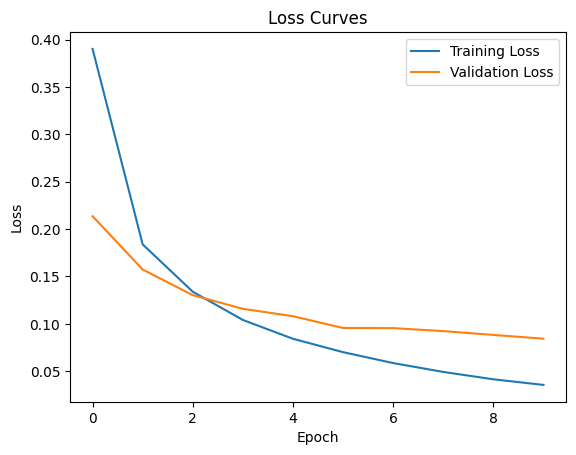

In [25]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### (i) Display any 5 correctly classified images and 5 incorrectly classified images with their actual labels and predicted labels.

In [26]:
# Function to display images along with predictions and truth
def display_images(images, actual_labels, predicted_labels, title, indices):
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices[:5]):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[index], cmap='gray')
        plt.title(f"True: {actual_labels[index]}\nPred: {predicted_labels[index]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

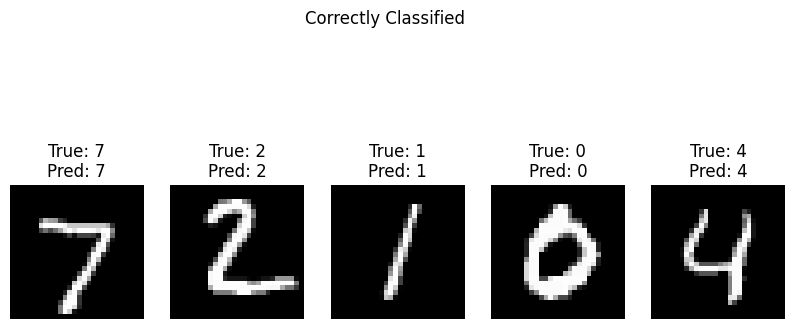

In [27]:
# Display 5 correctly classified images
correct_indices = np.where(predicted_labels == test_labels)[0]
display_images(test_images.reshape(-1, 28, 28), test_labels, predicted_labels, 'Correctly Classified', correct_indices)

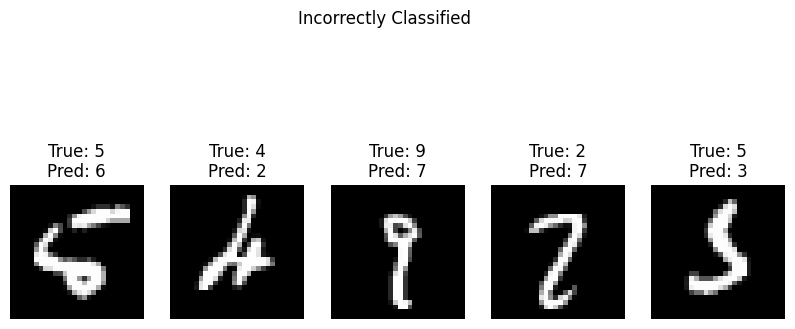

In [28]:
# Display 5 incorrectly classified images
incorrect_indices = np.where(predicted_labels != test_labels)[0]
display_images(test_images.reshape(-1, 28, 28), test_labels, predicted_labels, 'Incorrectly Classified', incorrect_indices)


## 6. Analysis

- Based on the plots, the training and validation loss curves, the model shows a consistent decrease in loss across epochs for both curves, which shows that there is effective learning happening without overfitting.
  - The gap between the training and validation losses remains small.
  - Therefore, the model is generalizing well.
  - As the model plateaus or curves plateau, the model is nearing its learning capacity.

- To enhance the model, we could try the following:
  - We could try a more complex network.
  - Implementing early stopping could prevent overtraining since the losses are stabilizing after some epochs.
  - Also, expanding or increasing the dataset could increase the model's performance.

In conclusion, the model is performing well.
